# Project Group 22 

Members: 
Fleur de Boer, Bastiaan van der Hoeven, Laetitia Molkenboer, Pim van der Velde, Alfareeq Rosan

Student numbers: 
4786297, 4666127, 4553934, 4569857, 1352418

# Research Objective

*Requires data modeling and quantitative research in Transport, Infrastructure & Logistics*

Through the years the amount of physical stores is getting smaller due to the rise of webshops (Weltevreden, 2012). To see if the effects are declarable, different questions will be formulated. Chosen is to do an application project, because this could show any connections between the different kind of purchasing through the years. 

*Research question*

In this project the research question "How did online shopping affect the number of physical stores in the Netherlands?"  will be discussed and examined. The physical stores are divided in different categories:
- Clothing and sporting goods
- Books, Magazines and Newspapers
- Household goods and appliances
- Electronic devices and supplies (software & hardware)

*Sub-questions*

The categories are chosen in order to answer the first sub-question: 'Which different types of retail are more sensitive as a result of ecommerce?' Different plots will be computed to give a clear insight in the relations between certain aspects. The specific relations in the plots will be discussed below. 

The other sub-question that will be discussed is: 'Which province in the Netherlands experienced the biggest change of the amount of physical stores over time?'

To answer the (sub)questions these plots will be made and discussed through the project:
- Overview of the population growth through the years
- Purchases online on average for men and women
- Diagram that shows the decrease in physical stores and the increase of online purchases in general and per category (in percentage)
- Animation through the years to show how the online and physical stores increased and decreased
- Physical stores decline in % per province between 2012-2019
- Heatmap of the Netherlands to show which provinces are sensitive


# Contribution Statement

*Be specific. Some of the tasks can be coding (expect everyone to do this), background research, conceptualisation, visualisation, data analysis, data modelling*

**Author 1: Fleur de Boer**: Introduction and overview of population growth, elaboration Research Objective and Data Used

**Author 2: Bastiaan van der Hoeven**:

**Author 3: Laetitia Molkenboer**: Plots of online purchases versus physical stores for all 4 categories

**Author 4: Pim van der Velde**: Heatmap of the Netherlands to show which provinces are most sensitive to change

**Author 5: Alfareeq**:

# Data Used

For the execution of this programming project, three datasets were used. These are the following:

1.	Online shopping dataset: 
https://www.cbs.nl/nl-nl/cijfers/detail/83430NED 
2.	Physical stores in The Netherlands:
https://opendata.cbs.nl/statline/#/CBS/nl/dataset/81578NED/table?dl=2E131 
3.	Population distribution by age:
https://opendata.cbs.nl/statline/#/CBS/nl/dataset/7461BEV/table?fromstatweb 

The first dataset contains the percentages of Dutch civilians above the age of 11 that purchase goods online. The dataset contains percentages for different categories. The first column contains the total percentages of people buying online. The other columns show the percentages of people buying specific goods. Since this dataset only gives percentages, the third dataset is used to quantify the percentages of people above 12 years old to a number of people above 12 years old. The following categories of this dataset have been used in this programming assignment:

- Total online purchases
- Clothes or sportarticles
- Books, magazines and papers
- Soft-/hardware and electronics	
- Household goods and devices	

The second dataset contains all numbers of physical establishments of companies in the Netherlands. This varies from energy plants to greenhouses and from flower stores to car manufacturers. For this assignment we are only interested in stores that comply with the categories of the first dataset. The list below shows in brackets which types of stores from this second dataset were preprocessed over the 4 categories of the first dataset.

1. Clothes or sportarticles (Winkels in watersportartikelen, Winkels in sportartikelen, Winkels in kleding & Winkels in schoenen en lederwaren)
2. Books, magazines and papers (Boekenwinkels, Winkels in lectuur en schrijfwaren)
3. Soft-/hardware and electronics (Winkels in consumentenelektronica, Winkels in computers en software, Winkels in communicatieapparatuur)	
4. Household goods and devices (Winkels in wit- en bruingoed; Winkels elektr. huishoudapparatuur)


# Data Pipeline


In [10]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import folium

In [11]:
#Loading of all datasets
pop = pd.read_csv('Data_stores\Bevolking.csv', delimiter = ';')
online_total = pd.read_csv('Data_online_shopping_total.csv', delimiter = ';', index_col = 0)
online_men = pd.read_csv('Data_online_shopping_men.csv', delimiter = ';', index_col = 0)
online_women = pd.read_csv('Data_online_shopping_women.csv', delimiter = ';', index_col = 0)
shopping_online = pd.read_csv('Data_online_shopping_total.csv', delimiter=';')
phys_stores = pd.read_csv('Stores_country_data.csv', delimiter=';')
density = pd.read_csv('dichtbevolkt2.csv', delimiter=';')

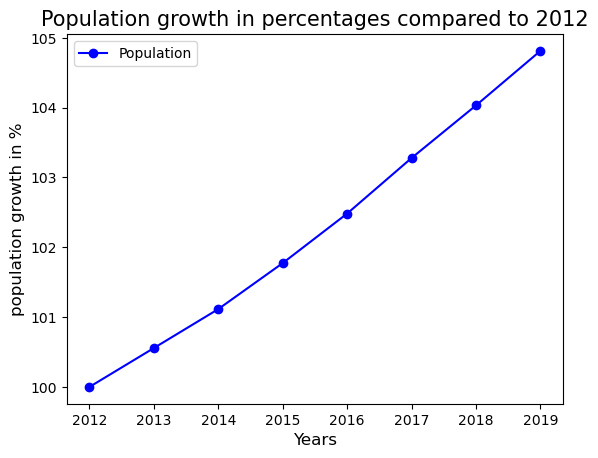

In [12]:
# Create the x & y-axis for the plot, y-axis is done in percentages compared to the year 2012. 
x = pop['year']
y = pop['population 12+'] / 10**6
y.a = y/y[0]*100

# create figure and axis objects with subplots()
fig,ax = plt.subplots()

# make a plot with different y-axis using second axis object
line2 = ax.plot(x,y.a,marker="o", color = 'b', label = 'Population')
#locs, labels = yticks()
ax.set_yticks(np.arange(100, 106, step=1)) 
ax.set_ylabel("population growth in %",fontsize=12)
ax.set_title("Population growth in percentages compared to 2012", fontsize=15)
ax.set_xlabel("Years",fontsize=12)
ax.legend()

plt.show()

One can see from the graph above that there is a steady increase in the Dutch population.

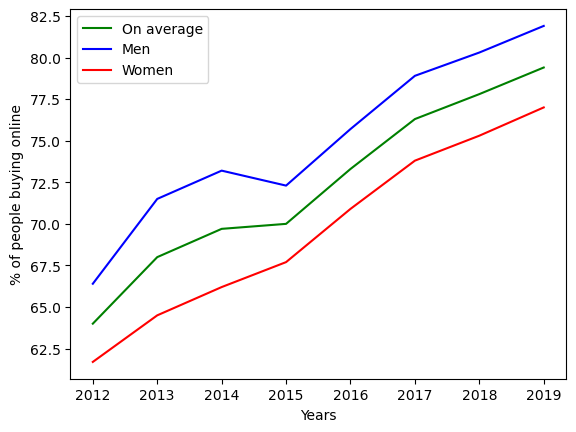

In [13]:
#Plot 2: Purchases online on average and for men and women

online_total['Totaal online aankopen'].plot(color = 'g', label = 'On average') #???? is het on average of totaal? Want bestand heet totaal online aankopem
online_men['Totaal online aankopen'].plot(color = 'b', label = 'Men')
online_women['Totaal online aankopen'].plot(color = 'r', label = 'Women')

plt.xlabel('Years')
plt.ylabel('% of people buying online')
plt.legend()

There is an increase in the percentage of people bying their goods online. Men tend to buy more online than women. While the women show a steady trend, the men had a more rapid increase at first, then a decrease and then a trend very similar to women.

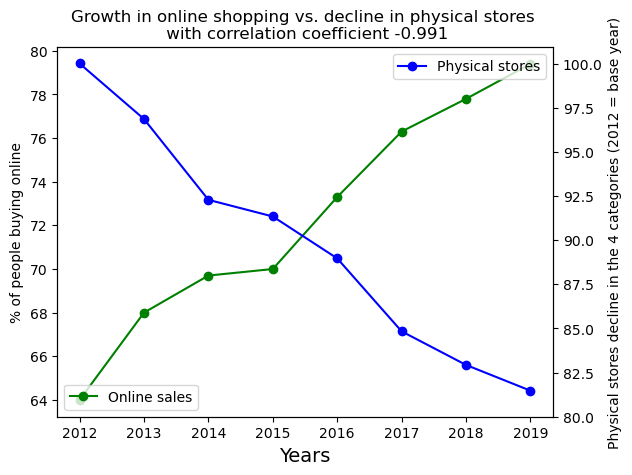

In [14]:
from scipy import stats
#Plot 3: Total physical stores versus total online purchases
x = phys_stores['Perioden']
y1 = (phys_stores['1. Kleding of sportartikelen'] + phys_stores['2. Boeken, tijdschriften en kranten'] + phys_stores['3. Soft-/ hardware en elektronische benodig'] + phys_stores['4. Huishoudelijke goederen en apparaten'])
y1a = (phys_stores['1. Kleding of sportartikelen'] + phys_stores['2. Boeken, tijdschriften en kranten'] + 
phys_stores['3. Soft-/ hardware en elektronische benodig'] + phys_stores['4. Huishoudelijke goederen en apparaten']) / y1[0] * 100


# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
line1 = ax.plot(online_total['Totaal online aankopen'], marker="o", label = 'Online sales', color = 'g')
ax.set_xlabel('Years',fontsize=14)
ax.set_ylabel('% of people buying online',fontsize=10)
ax.legend(loc = 'lower left')

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
line2 = ax2.plot(x,y1a,marker="o", label = 'Physical stores', color = 'b')
ax2.set_yticks(np.arange(79.999,100.001, step=2.5)) 
ax2.set_ylabel("Physical stores decline in the 4 categories (2012 = base year)",fontsize=10)

corr_coef = stats.pearsonr(online_total['Totaal online aankopen'], y1a)[0]
ax2.legend(loc = 'upper right')
plt.title(f"Growth in online shopping vs. decline in physical stores \n with correlation coefficient %.3f" % corr_coef)

plt.show()

The Pearson correlation coefficient for the total percentages growth and decline percentages is: -0.99074. This means that the growth in online shopping is inversely correlated with the development in physical stores. Thus an increase in one variable is associated with a decrease in the other

The online sales increased rapidly at first, but then the curve flattens in the years 2014-2015. However, afterwards there is an increase once again. The trend in physical stores on the other hand shows a decline with the Netherlands losing more than 6000 stores in 8 years, around 20% of the stores for the four categories.

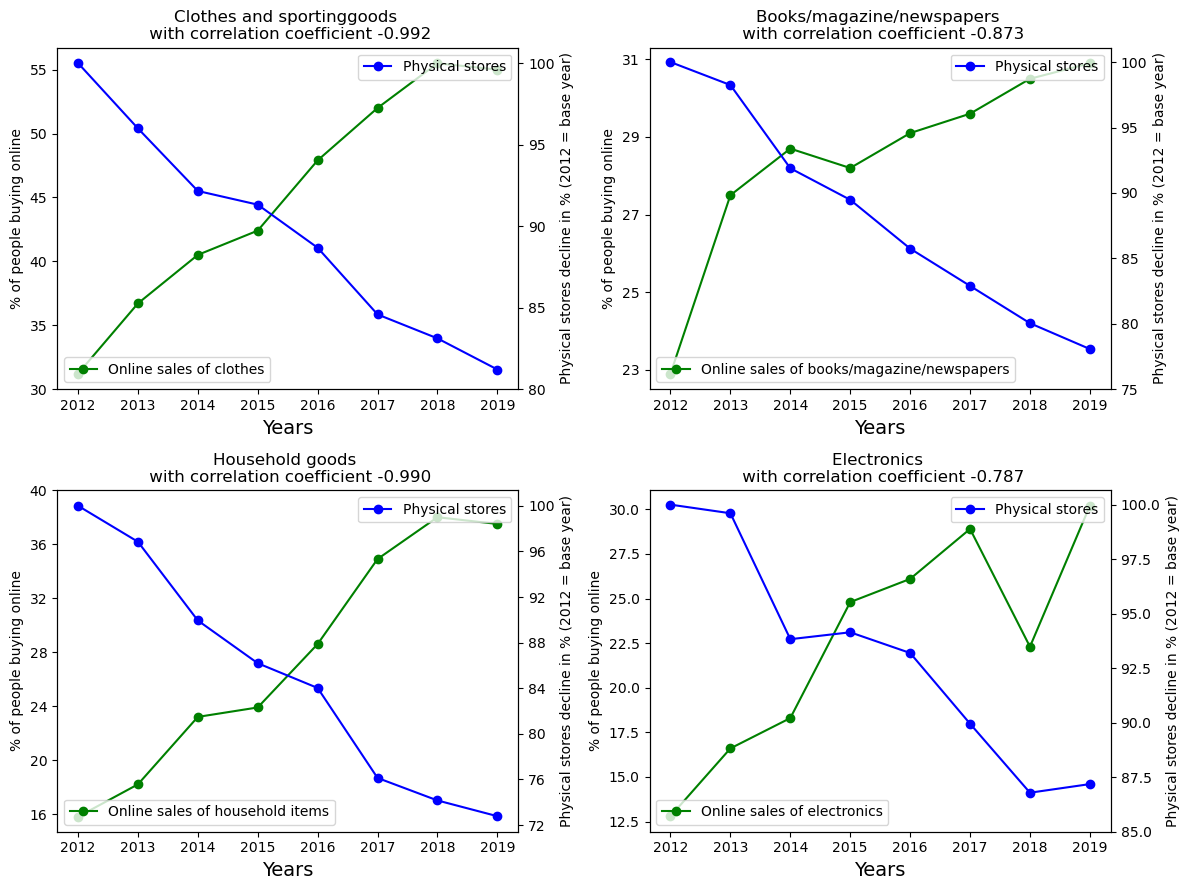

In [16]:
#Plots 4 through 7: Online purchases versus physical stores per category

fig = plt.figure(figsize=(12, 9))
gs = fig.add_gridspec(nrows=2, ncols=2)

######################Clothes graph#########################

ax = fig.add_subplot(gs[0,0])
x = phys_stores['Perioden']
y00 = phys_stores['1. Kleding of sportartikelen']
y01 = shopping_online['Kleding of sportartikelen']
y00.a = y00 / y00[0] * 100

line1 = ax.plot(x, y01, marker="o", label = 'Online sales of clothes', color = 'g')
ax.set_xlabel('Years',fontsize=14)
ax.set_ylabel('% of people buying online',fontsize=10)
corr_coef = stats.pearsonr(y01, y00.a)[0]
ax.set_title(f"Clothes and sportinggoods \n with correlation coefficient %.3f" % corr_coef)
ax.legend(loc = 'lower left')

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
line2 = ax2.plot(x,y00.a,marker="o", label = 'Physical stores', color = 'b')
ax2.set_yticks(np.arange(79.999,100.001, step=5))
ax2.set_ylabel("Physical stores decline in % (2012 = base year)",fontsize=10)

ax2.legend()

#####################Books graph################################

ax = fig.add_subplot(gs[0,1])
y10 = phys_stores['2. Boeken, tijdschriften en kranten']
y11 = shopping_online['Boeken, tijdschriften en kranten']
y10.a = y10 / y10[0] * 100

line1 = ax.plot(x, y11, marker="o", label = 'Online sales of books/magazine/newspapers', color = 'g')
ax.set_xlabel('Years',fontsize=14)
ax.set_ylabel('% of people buying online',fontsize=10)
ax.set_yticks(np.arange(23,31.001, step=2))
corr_coef = stats.pearsonr(y11, y10.a)[0]
ax.set_title(f"Books/magazine/newspapers \n with correlation coefficient %.3f" % corr_coef)
ax.legend(loc = 'lower left')

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
line2 = ax2.plot(x,y10.a,marker="o", label = 'Physical stores', color = 'b')
ax2.set_ylabel("Physical stores decline in % (2012 = base year)",fontsize=10)
ax2.set_yticks(np.arange(74.999,100.001, step=5))

ax2.legend()

#####################Electronics graph#########################

ax = fig.add_subplot(gs[1,1])
y20 = phys_stores['3. Soft-/ hardware en elektronische benodig']
y21 = shopping_online['Soft-/ hardware en elektronische benodig']
y20.a = y20 / y20[0] * 100

line1 = ax.plot(x, y21, marker="o", label = 'Online sales of electronics', color = 'g')
ax.set_xlabel('Years',fontsize=14)
ax.set_ylabel('% of people buying online',fontsize=10)


corr_coef = stats.pearsonr(y21, y20.a)[0]
ax.set_title(f"Electronics \n with correlation coefficient %.3f" % corr_coef)
ax.legend(loc = 'lower left')

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
line2 = ax2.plot(x,y20.a,marker="o", label = 'Physical stores', color = 'b')
ax2.set_yticks(np.arange(84.999,100.001, step=2.5))
ax2.set_ylabel("Physical stores decline in % (2012 = base year)",fontsize=10)

ax2.legend()

######################Household goods graph#######################

ax = fig.add_subplot(gs[1,0])
y30 = phys_stores['4. Huishoudelijke goederen en apparaten']
y31 = shopping_online['Huishoudelijke goederen en apparaten']
y30.a = y30 / y30[0] * 100

line1 = ax.plot(x, y31, marker="o", label = 'Online sales of household items', color = 'g')
ax.set_xlabel('Years',fontsize=14)
ax.set_ylabel('% of people buying online',fontsize=10)
ax.set_yticks(np.arange(15.999,40.001, step=4))

corr_coef = stats.pearsonr(y31, y30.a)[0]
ax.set_title(f"Household goods \n with correlation coefficient %.3f" % corr_coef)
ax.legend(loc = 'lower left')

ax2=ax.twinx()
# make a plot with different y-axis using second axis object
line2 = ax2.plot(x,y30.a,marker="o", label = 'Physical stores', color = 'b')
ax2.set_yticks(np.arange(71.999,100.001, step=4))
ax2.set_ylabel("Physical stores decline in % (2012 = base year)",fontsize=10)

ax2.legend()

##########################################################################
plt.tight_layout()
plt.show()

All four categories show an increase in online purchasing and a decrease in physical stores. However, where the lines cross is different for each category. For clothes and sporting goods it is the year 2015, books and magazines 2014, household items also 2015 and electronics around 2014. So the switch in dominance occured earlier for the books and magazines and electronics than for the other two categories.

In [15]:
file_path = 'Netherlands map/data/provincies/B1_Provinciegrenzen_van_NederlandPolygon.shp'
gdf_prov = gpd.read_file(file_path)

df = pd.read_csv('Stores_province_data.csv', delimiter = ';', index_col = 0)

province1 = ['Groningen', 'Fryslân', 'Drenthe', 'Overijssel', 'Flevoland', 'Gelderland', 'Utrecht', 'Noord-Holland', 'Zuid-Holland', 'Zeeland', 'Noord-Brabant', 'Limburg']
province = pd.DataFrame(province1, columns = ['Provincie'])

dftest = []
for i in range(0, 12):
    t = df.iloc[5,i*8]
    u = df.iloc[5,i*8+7]
    dftest.append((t-u)/t*100)
dfnew = pd.DataFrame(dftest, columns = ['Stores decline in %'])

df_decline = pd.concat([province,dfnew], axis=1)
print(df_decline)

        Provincie  Stores decline in %
0       Groningen            22.018349
1         Fryslân            21.086262
2         Drenthe            18.592965
3      Overijssel            16.460905
4       Flevoland             5.673759
5      Gelderland            17.973462
6         Utrecht            12.704918
7   Noord-Holland            18.048780
8    Zuid-Holland            19.751166
9         Zeeland            22.535211
10  Noord-Brabant            20.406190
11        Limburg            14.176245


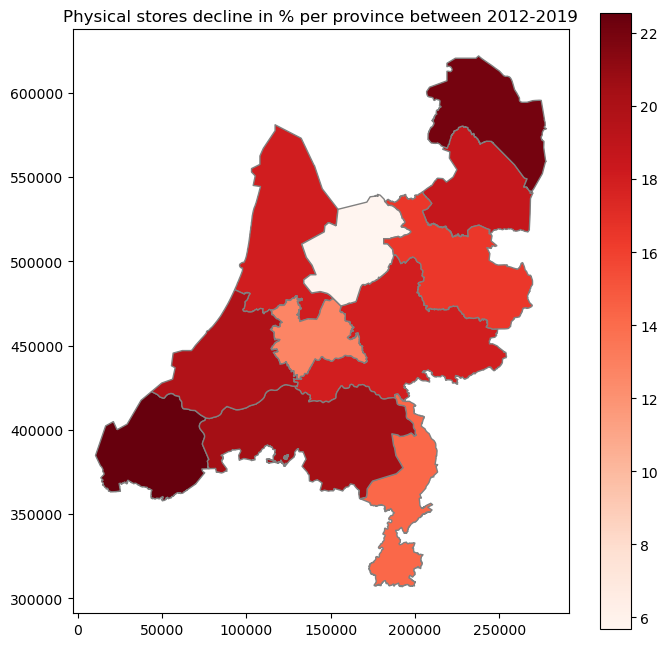

In [ ]:
gdf_prov_dec = pd.merge(gdf_prov, df_decline, left_on='PROV_NAAM', right_on='Provincie', how='left')

fig, ax = plt.subplots(figsize=(8,8))

column = 'Stores decline in %'
gdf_prov_dec.plot(ax=ax, edgecolor='gray', cmap='Reds', column=column, legend=True)
plt.title("Physical stores decline in % per province between 2012-2019")
plt.show()

        Provincie  Urban/Rural
0       Groningen            0
1         Fryslân            0
2         Drenthe            0
3      Overijssel            0
4       Flevoland            0
5      Gelderland            0
6         Utrecht            1
7   Noord-Holland            1
8    Zuid-Holland            1
9         Zeeland            0
10  Noord-Brabant            0
11        Limburg            1


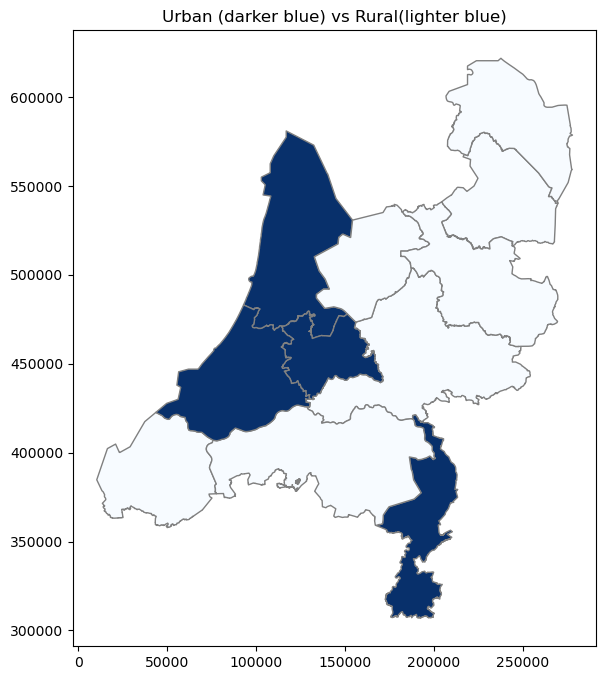

In [ ]:
density.iloc[:,4]

dftest2 = []
for i in range(0, 12):
    t = density.iloc[i,4]
    dftest2.append(t)

dfnew2 = pd.DataFrame(dftest2, columns = ['Urban/Rural'])
df_dens = pd.concat([province,dfnew2], axis=1)
print(df_dens)

gdf_prov_dens = pd.merge(gdf_prov, df_dens, left_on='PROV_NAAM', right_on='Provincie', how='left')

fig, ax = plt.subplots(figsize=(8,8))

column = 'Urban/Rural'
gdf_prov_dens.plot(ax=ax, edgecolor='gray', cmap='Blues', column=column, legend=False)
plt.title("Urban (darker blue) vs Rural (lighter blue)")
plt.show()

# Bibliography

Weltevreden, J. W. J. (2012). De evolutie van online winkelen in Nederland. Hogeschool van
Amsterdam.